In [46]:
from PIL import Image
import cv2
import os
import math
import matplotlib.pyplot as plt
import numpy as np

In [15]:
orig_data_dir = '/home/zal/Data/DETRAC/DETRAC-Train-Data-Orientation'
!ls '/home/zal/Data/DETRAC/DETRAC-Train-Data-Orientation' | head -10000

MVI_20011_F_100_ID_10.jpg
MVI_20011_F_100_ID_11.jpg
MVI_20011_F_100_ID_12.jpg
MVI_20011_F_100_ID_13.jpg
MVI_20011_F_100_ID_14.jpg
MVI_20011_F_100_ID_15.jpg
MVI_20011_F_100_ID_16.jpg
MVI_20011_F_100_ID_17.jpg
MVI_20011_F_100_ID_3.jpg
MVI_20011_F_100_ID_4.jpg
MVI_20011_F_100_ID_5.jpg
MVI_20011_F_100_ID_7.jpg
MVI_20011_F_100_ID_8.jpg
MVI_20011_F_100_ID_9.jpg
MVI_20011_F_101_ID_10.jpg
MVI_20011_F_101_ID_11.jpg
MVI_20011_F_101_ID_12.jpg
MVI_20011_F_101_ID_13.jpg
MVI_20011_F_101_ID_14.jpg
MVI_20011_F_101_ID_15.jpg
MVI_20011_F_101_ID_16.jpg
MVI_20011_F_101_ID_17.jpg
MVI_20011_F_101_ID_3.jpg
MVI_20011_F_101_ID_4.jpg
MVI_20011_F_101_ID_5.jpg
MVI_20011_F_101_ID_7.jpg
MVI_20011_F_101_ID_8.jpg
MVI_20011_F_101_ID_9.jpg
MVI_20011_F_102_ID_10.jpg
MVI_20011_F_102_ID_11.jpg
MVI_20011_F_102_ID_12.jpg
MVI_20011_F_102_ID_13.jpg
MVI_20011_F_102_ID_14.jpg
MVI_20011_F_102_ID_15.jpg
MVI_20011_F_102_ID_16.jpg
MVI_20011_F_102_ID_17.jpg
MVI_20011_F_102_ID_3.jpg
MVI_20011_F_102_ID_4.jpg
MVI_20011_F_102_ID_5.jpg
M

MVI_20012_F_129_ID_12.jpg
MVI_20012_F_129_ID_13.jpg
MVI_20012_F_129_ID_14.jpg
MVI_20012_F_129_ID_15.jpg
MVI_20012_F_129_ID_16.jpg
MVI_20012_F_129_ID_3.jpg
MVI_20012_F_129_ID_42.jpg
MVI_20012_F_129_ID_4.jpg
MVI_20012_F_129_ID_5.jpg
MVI_20012_F_129_ID_8.jpg
MVI_20012_F_12_ID_10.jpg
MVI_20012_F_12_ID_11.jpg
MVI_20012_F_12_ID_1.jpg
MVI_20012_F_12_ID_3.jpg
MVI_20012_F_12_ID_42.jpg
MVI_20012_F_12_ID_4.jpg
MVI_20012_F_12_ID_5.jpg
MVI_20012_F_12_ID_6.jpg
MVI_20012_F_12_ID_7.jpg
MVI_20012_F_12_ID_8.jpg
MVI_20012_F_12_ID_9.jpg
MVI_20012_F_130_ID_11.jpg
MVI_20012_F_130_ID_12.jpg
MVI_20012_F_130_ID_13.jpg
MVI_20012_F_130_ID_14.jpg
MVI_20012_F_130_ID_15.jpg
MVI_20012_F_130_ID_16.jpg
MVI_20012_F_130_ID_3.jpg
MVI_20012_F_130_ID_42.jpg
MVI_20012_F_130_ID_4.jpg
MVI_20012_F_130_ID_5.jpg
MVI_20012_F_130_ID_8.jpg
MVI_20012_F_131_ID_11.jpg
MVI_20012_F_131_ID_12.jpg
MVI_20012_F_131_ID_13.jpg
MVI_20012_F_131_ID_14.jpg
MVI_20012_F_131_ID_15.jpg
MVI_20012_F_131_ID_16.jpg
MVI_20012_F_131_ID_3.jpg
MVI_20012_F_13

ls: write error: Broken pipe


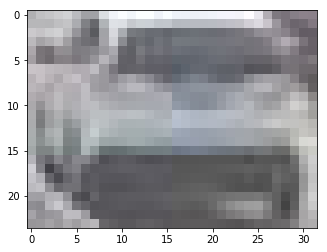

In [16]:
sample_fname = 'MVI_20012_F_267_ID_16.jpg'
sample_img = Image.open(os.path.join(orig_data_dir, sample_fname)) 
plt.imshow(sample_img)

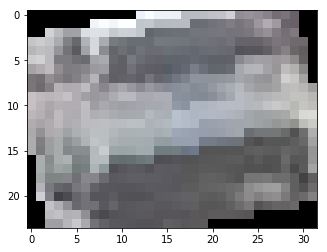

In [22]:
sample_prot = sample_img.rotate(11.25)
plt.imshow(sample_prot)

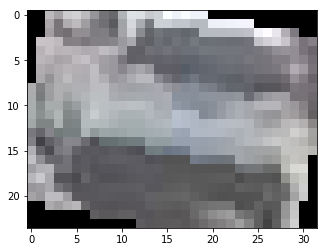

In [20]:
sample_nrot = sample_img.rotate(-11.25)
plt.imshow(sample_nrot)

In [44]:
def rotate_max_area(image, angle):
    def get_rotated_rect_max_area(w, h, angle):
        if w <= 0 or h <= 0:
            return 0,0

        width_is_longer = w >= h
        side_long, side_short = (w,h) if width_is_longer else (h,w)

        # since the solutions for angle, -angle and 180-angle are all the same,
        # if suffices to look at the first quadrant and the absolute values of sin,cos:
        sin_a, cos_a = abs(math.sin(angle)), abs(math.cos(angle))
        if side_short <= 2.*sin_a*cos_a*side_long or abs(sin_a-cos_a) < 1e-10:
            # two crop corners touch the longer side,
            # the other two corners are on the mid-line parallel to the longer line
            x = 0.5*side_short
            wr,hr = (x/sin_a,x/cos_a) if width_is_longer else (x/cos_a,x/sin_a)
        else:
            # crop touches all 4 sides
            cos_2a = cos_a*cos_a - sin_a*sin_a
            wr,hr = (w*cos_a - h*sin_a)/cos_2a, (h*cos_a - w*sin_a)/cos_2a

        return wr,hr

    def rotate_bound(image, angle):
        (h, w) = image.shape[:2]
        (cX, cY) = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D((cX, cY), -angle, 1.0)
        cos = np.abs(M[0, 0])
        sin = np.abs(M[0, 1])
        nW = int((h * sin) + (w * cos))
        nH = int((h * cos) + (w * sin))
        M[0, 2] += (nW / 2) - cX
        M[1, 2] += (nH / 2) - cY
        return cv2.warpAffine(image, M, (nW, nH))

    wr, hr = get_rotated_rect_max_area(image.shape[1], image.shape[0], math.radians(angle))
    rotated = rotate_bound(image, angle)
    h, w, _ = rotated.shape
    y1 = h//2 - int(hr/2)
    y2 = y1 + int(hr)
    x1 = w//2 - int(wr/2)
    x2 = x1 + int(wr)
    return rotated[y1:y2, x1:x2]

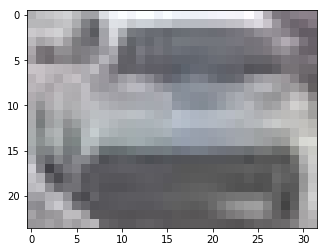

In [37]:
sample_img = cv2.imread(os.path.join(orig_data_dir, sample_fname))
plt.imshow(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB) )

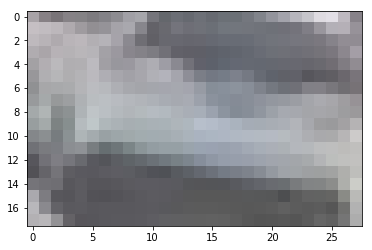

In [47]:
sample_prot = rotate_max_area(sample_img, 11.25)
plt.imshow(cv2.cvtColor(sample_prot, cv2.COLOR_BGR2RGB))